# Support Vector Machine, SVM)
데이터를 분류하는 알고리즘 중 하나. 각 데이터 포인트들을 고차원 공간으로 매핑한 후, 그 공간에서 최대한 많은 데이터 포인트들을 서로 분리하는 초평면을 찾는 것이다. 이 때, 분리된 두 클래스 사이의 거리를 최대화하는 초평면을 찾게 되며, 이를 위해 서포트 벡터라는 개념 사용. 최대 마진 분류라고도 한다.

- SVM의 장점
> 1. 이상치에 강하다. SVM은 large margin을 생성하므로, 이상치에 대해서도 강건하게 분류할 수 있다. (large margin : 결정 경계와 데이터 간의 거리를 최대화하는 것을 의미. 즉, SVM은 데이터 간의 간격을 최대화하여 결정 경계를 찾는 것이다. 이를 통해 SVM은 일반화 성능을 높이고, 이상치에 덜 민감하도록 만들 수 있다. 이러한 라지 마진의 개념은 SVM의 핵심 아이디어 중 하나이다.
> 2. 다양한 커널을 사용할 수 있다. 커널 함수를 통해 고차원 데이터를 다룰 수 있으므로, 비선형 분류 문제도 해결할 수 있다.
> 3. 과적합 방지 SVM은 라지 마진을 만드는 방식으로 모델을 학습하므로, 과적합 문제를 방지할 수 있다.
> 4. 높은 정확도 SVM은 다른 분류 알고리즘보다 높은 정확도를 보이는 경우가 많다.

- SVM의 한계
> 1. 커널 함수 선택의 어려움 : 커널 함수가 데이터의 성질과 맞지 않으면 성능이 낮아질 수 있다. 이를 조절하기 위해서는 매개변수 튜닝 필요
> 2. 대용량 데이터에 대한 처리 어려움 : SVM은 데이터의 크기가 커지면 계산 복잡도가 증가하므로, 대용량 데이터 처리에 어려움을 겪을 수 있다.
> 3. 다중 클래스 분류에 대한 처리 어려움 : SVM은 이진분류에만 적용할 수 있으며, 다중 클래스 분류 문제를 해결하기 위해서는 복잡한 전략이 필요

### 선형 SVM, 비선형 SVM
- 다중 클래스 SVM
> 이진 분류 모델을 여러 개 결합하여 다중 클래스 분류 문제를 해결하는 방법. 일대다, 일대일 방법이 있음
- 회귀 SVM
> 입력 데이터의 값이 어떤 범위 안에 속하도록 하는 결정 경계를 찾는다. 일반적으로 제한된 범위 내에서 오차가 가장 작도록 하는 SVM을 이용함
- 선형 SVM은 선형적으로 분리 가능한 데이터셋에서 사용하는 SVM이다. 선형 SVM은 SVM의 가장 기본이 되는 형태로, 선형적인 결정 경계를 사용하여 데이터셋을 분류하는 방식이다.
- 선형 SVM의 목적은 마진을 최대화하는 결정 경계를 찾는 것이다. 이를 위해 SVM은 각 클래스 사이의 가장 가까운 샘플로부터 일정한 거리를 유지하는 결정 경계를 찾는다. 이 때 가장 가까운 샘플들을 서포트 벡터라고 한다.
- 선형 SVM에서는 선형 결정 경계를 찾기 위해 선형 커널을 사용한다. 선형 커널은 입력데이터의 내적을 계산하여 새로운 특성 공간을 만들어내는데, 이를 통해 비선형 결정 경계를 선형 결정 경계로 매핑할 수 있다.

### Pytorch를 사용한 선형 SVM 모델 학습 및 결정 경계 시각화

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# 데이터 생성
x = torch.randn(100, 2)
y = torch.where(x[:, 0] > x[:, 1], 1, -1).float()
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=10)

# SVM 모델 정의
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        return self.linear(x)
    
# SVM 모델 정의
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.linear(x)
    
# model, loss, optimizer 생성
model = SVM()
criterion = nn.HingeEmbeddingLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습
for epoch in range(50):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) & 10 == 0:
        print(f"Epoch -{epoch+1}/50], Loss : {loss.item():.4f}")
        

Epoch -1/50], Loss : 0.4922
Epoch -4/50], Loss : 0.2118
Epoch -5/50], Loss : 0.1209
Epoch -16/50], Loss : -0.5333
Epoch -17/50], Loss : -0.5757
Epoch -20/50], Loss : -0.7010
Epoch -21/50], Loss : -0.7392
Epoch -32/50], Loss : -1.1215
Epoch -33/50], Loss : -1.1555
Epoch -36/50], Loss : -1.2570
Epoch -37/50], Loss : -1.2908
Epoch -48/50], Loss : -1.6585
Epoch -49/50], Loss : -1.6917


### Pytorch를 사용한 선형 SVM 모델 학습 및 결정 경계 시각화

In [3]:
# 결정 경계 시각화
import matplotlib.pyplot as plt
import numpy as np

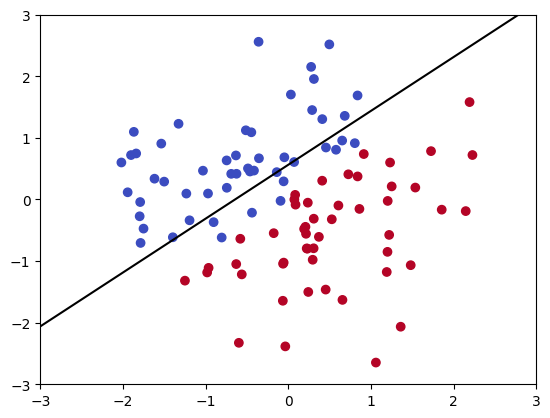

In [4]:
w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

빨간색 점이 -1 클래스, 파란색 점이 1 클래스에 속하는 데이터를 나타내며, 실선이 SVM 모델이 추정한 결정 경계를 나타낸다.

커널 SVM은 SVM 알고리즘의 한 종류로, 선형으로 분리되지 않는 비선형 데이터를 분류하는 데 사용됨.<br>
커널 SVM은 비선형 변환으로 인한 고차원 공간에서의 계산 비용 문제를 해결하기 위해, 커널 함수를 사용한다. 커널 함수는 두 데이터 간의 유사도를 계산하여 고차원 공간에서의 내적 연산을 대신한다. 이를 통해 고차원 공간에서의 분류 문제를 해결할 수 있다.<br>
커널 SVM의 핵심은 서포트 벡터이다. 커널 SVM은 RBF 커널, 다항 커널 등 다양한 커널 함수를 사용할 수 있으며, 적절한 커널 함수를 선택하는 것이 분류 성능에 큰 영향을 미친다. 커널 함수의 선택은 trial and error를 통해 적절한 값을 찾는 것이 일반적이다.<br>

- 선형 커널 : 가장 기본적인 커널 함수, 데이터가 선형적으로구분 가능한 경우에 사용 
- 다항식 커널 : 데이터가 다항식 형태로 구분 가능한 경우에 사용된다.
- 가우시안 커널 : 데이터가 비선형적으로 구분 가능한 경우에 사용된다.
- 시그모이드 커널 : 데이터가 비선형적으로 구분 가능한 경우에 사용
- 라디얼 베이스 커널 : 가우시안 커널과 유사한 형태를 가지며, 여러 종류의 문제에서 잘 작동한다.

### SVM을 이용한 이상탐지
1. One-class SVM : 정상 샘플만으로 모델을 학습시키는 것. 이 경우 모델은 하나의 클래스를 학습하게 된다. 이 때, SVM의 커널 트릭을 활용하여, 비선형적인 경계면을 학습할 수 있다. 학습된 모델은 이후에 이상으로 분류될 가능성이 있는 데이터를 탐지하는 데 사용된다.
2. Two-class SVM : 일반적인 SVM과 동일하게 두 개 이상의 클래스가 있는 데이터에서 사용된다. 이 경우, 정상 클래스와 비정상 클래스를 각각 포함하는 데이터 세트를 준비하고, SVM 모델을 학습시킨다. 이후, 비정상 클래스에 속하는 데이터가 입력되면 모델은 이를 이상으로 분류할 것이다.

### One-class SVM을 사용하여 데이터에서 이상 탐지

In [5]:
from sklearn.datasets import make_moons

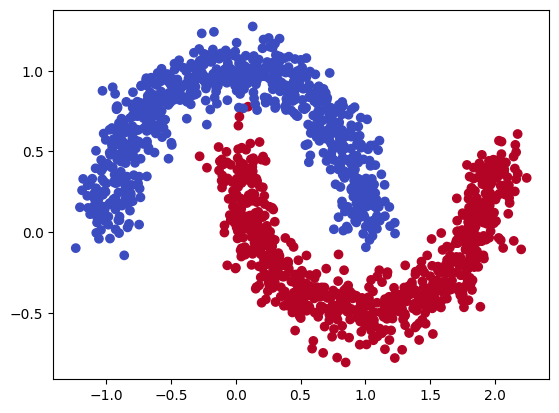

In [6]:
# 데이터 생성
x, y = make_moons(n_samples = 1500, noise=0.1, random_state = 42)

# 데이터 시각화
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

파란색은 내부에 해당하는 샘플들, 빨간색은 이상치 => 파란색 : 클래스 0, 빨간색 : 클래스 1

### 이상 데이터 설정

In [8]:
outliers_ratio = 0.1                                # 이상치 비율
n_outliers = int(outliers_ratio * len(x))           # 이상치 데이터 개수
n_liners = len(x) - n_outliers                      # 정상 데이터 개수

rng = np.random.RandomState(777)                    # 난수 생성기 객체
# 난수 생성 객체
x_outliers = 1.5 * rng.uniform(low = -1, high=3, size=(n_outliers, 2))
# 이상치 데이터 생성 난수 생성을 이용해서 uniform 분포를
# 따르는 값을 생성 ->  이 값을 1.5배 해서 이상치 데이터 생성

x = np.vstack([x, x_outliers])            # 이상치 데이터를 기존 데이터 추가
y = np.hstack([y, -1 * np.ones(n_outliers)]) # 이상치 데이터의 클래스는 -1로 설정

F1 score: 0.4028


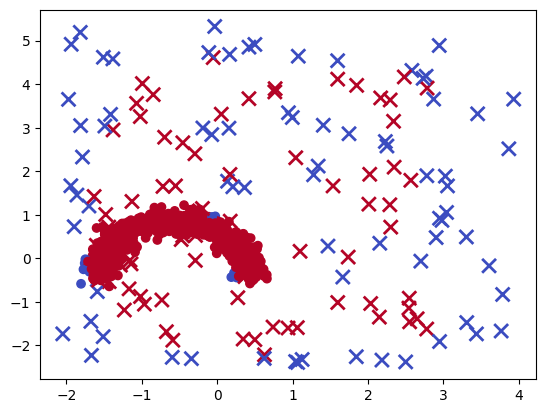

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

# 데이터 정규화
x = (x - x.mean(axis=0)) / x.std(axis=0)

# 학습 및 평가 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)

# One-class SVM 모델 학습
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
model.fit(x_train)

# 이상 탐지
y_pred = model.predict(x_test)  # 수정된 부분
y_pred = np.where(y_pred == 1, 0, y_pred)   # 1을 0으로, -1을 1로 변환
# scoee = f1_score(y_test, y_pred, pos_label=-1)
score = f1_score(y_test, y_pred, average='macro')

print(f"F1 score: {score:.4f}")

# 모든 데이터 포인트에 대한 예측 결과 얻기
y_pred_all = model.predict(x)

# 이상치 데이터와 정상 데이터를 분리하여 시각화
x_inliers = x[y==0]
x_outliers = x[y== -1]
y_pred_inliers = y_pred_all[y==0]
y_pred_outliers = y_pred_all[y == -1]

plt.scatter(x_inliers[:, 0], x_inliers[:, 1], c=y_pred_inliers, cmap=plt.cm.coolwarm)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c=y_pred_outliers, cmap=plt.cm.coolwarm, marker='x', s=100, linewidth=2)
plt.show()

파란색 점은 정상 데이터, 빨간색 점은 이상치 데이터, 이상치 데이터는 십자가로 표시<br>
이상치 데이터가 많을수록, 그리고 모델이 잘 예측할수록 십자가가 더 적게 나타남

## SVM을 활용한 이미지 분류
SVM은 분류 문제에서 결정 경계를 찾는 알고리즘으로, 이를 이미지 분류 문제에 적용할 경우 이미지 데이터를 특징 벡터로 변환하고, 이를 SVM 모델에 입력하여 각 이미지가 어떤 클래스에 속하는지 분류할 수 있다.
#### Pytorch, sklearn.svm을 이용해 svm을 활용한 이미지 분류

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision
from sklearn.svm import SVC
from tqdm import tqdm

# 데이터셋 로드
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False, num_workers=2)

# 특징 추출
train_features = []
train_labels = []
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1)
    train_features.append(inputs)
    train_labels.append(labels)
train_features = torch.cat(train_features, dim=0)
train_labels = torch.cat(train_labels, dim=0)

test_features = []
test_labels = []
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1)
    test_features.append(inputs)
    test_labels.append(labels)
test_features = torch.cat(test_features, dim = 0)
test_labels = torch.cat(test_labels, dim = 0)

# SVM 모델 학습 및 평가
# SVM 모델은 Pytorch에서 직접 구현되어 있지 않으므로, Pytorch로 작성된 코드에서는 sklearn  모듈을 사용하여 SVM 모델을 구현해야 한다.
# 대략적으로 학습 시간 9분 ~ 10분 정도 소요
import time
print("SVM MODEL TRAIN AND TEST")
start_time = time.time()
model = SVC(C=1.0, kernel='rbf', gamma=0.01)
model.fit(train_features.numpy(), train_labels.numpy())
acc = model.score(test_features.numpy(), test_labels.numpy())
end_time = time.time()
print('Accuracy : ', acc)
train_time = end_time - start_time
print("Training time : {:.2f} seconds".format(train_time))

SVM MODEL TRAIN AND TEST


KeyboardInterrupt: 

In [ ]:
# 예측 결과 시각화
def plot_images(images, labels, preds):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1))
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = 'label : {}\npred: {}'.format(labels[i], preds[i])
        ax.set_title(title)
        ax.axis('off')
    plt.subplots_adjust(top=0.5, bottom=0, hspace=0, wspace=0.5)
    plt.show()
    
# 테스트 이미지 가져오기
test_images, test_labels = next(iter(testloader))
test_images = test_images.view(test_images.shape[0], -1)

# 모델 예측
test_preds = model.predict(test_image.numpy())

# 결과 시각화
plot_images(test_images.numpy(), test_labels.numpy(), test_preds)